In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

## Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [88]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor

## Область работы 2 (поиск модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train_house_B.csv'# содержит только имя файла, без имен папок !!!

In [5]:
data_train = pd.read_csv(path_train)

In [6]:
data_train

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,2604000,1.222962,0.047686,-1.033389,-2.465344,0.831065,0.802990,1.590989,0.727946,0.893957,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063,1.307431
1,4900000,-0.091662,-0.356325,-0.486840,-2.465344,-0.126718,-0.024866,-0.323972,1.658337,1.751428,...,-0.141322,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618,-0.478408
2,4480000,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431
3,3234000,1.222962,-1.570692,-0.696696,0.405623,-0.670784,-0.024866,0.557116,-1.280083,1.273040,...,-0.141322,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063,-0.478408
4,3780000,-1.406286,-1.563680,-1.058295,0.405623,-0.126718,-0.879174,-1.649281,0.496669,0.255596,...,-0.141322,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063,-0.478408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,3360000,-0.091662,0.593876,-0.087882,-2.465344,0.077307,0.151482,1.452151,1.772175,-1.264971,...,-0.141322,-0.554035,1.403419,-0.570187,0.454355,-0.805741,1.378217,1.200306,-0.679063,1.307431
404,5950000,-1.406286,0.179794,0.640850,0.405623,-0.126718,-0.975186,-1.028510,0.203867,-1.190658,...,-0.141322,1.804941,0.047278,-0.570187,-1.037904,1.517692,-0.929397,0.960546,-0.679063,-0.478408
405,3675000,-0.091662,1.099966,0.225750,-2.465344,-0.716123,-0.534316,-0.090348,1.151380,1.631097,...,-0.141322,-0.554035,-1.308863,-0.570187,0.477182,-0.805741,-0.929397,-1.512245,-0.679063,1.307431
406,7455000,1.222962,1.498909,-0.392289,0.405623,-0.126718,-0.024866,1.484438,-1.233671,-0.469048,...,-0.141322,-0.554035,0.047278,1.421812,0.407275,0.355976,0.224410,-1.477806,-0.679063,-0.478408


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   408 non-null    int64  
 1   0       408 non-null    float64
 2   1       408 non-null    float64
 3   2       408 non-null    float64
 4   3       408 non-null    float64
 5   4       408 non-null    float64
 6   5       408 non-null    float64
 7   6       408 non-null    float64
 8   7       408 non-null    float64
 9   8       408 non-null    float64
 10  9       408 non-null    float64
 11  10      408 non-null    float64
 12  11      408 non-null    float64
 13  12      408 non-null    float64
 14  13      408 non-null    float64
 15  14      408 non-null    float64
 16  15      408 non-null    float64
 17  16      408 non-null    float64
 18  17      408 non-null    float64
 19  18      408 non-null    float64
 20  19      408 non-null    float64
 21  20      408 non-null    float64
 22  21

In [8]:
data_train.isna().sum()

price    0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
dtype: int64

In [9]:
def histmaker_for_numeric_df(data_train, bins=20, figsize=(15, 5), palette='deep'):
    numeric_df = data_train.select_dtypes(include=np.number)

    sns.set(style='darkgrid', palette=palette)

    num_plots = len(numeric_df.columns)  # количество графиков
    num_rows = (num_plots - 1) // 3 + 1  # количество строк 
    num_cols = min(num_plots, 3)         # количество столбцов

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(figsize[0], figsize[1] * num_rows))
    plt.suptitle('Гистограммы каждой фичи', fontsize=15)

    axes = axes.flatten()
    for i, ax in enumerate(axes):
        if i < num_plots:
            ax.hist(numeric_df.iloc[:, i], bins=bins, edgecolor='black', alpha=0.7)
            ax.set_title(numeric_df.columns[i], weight='bold')
            if i % 3 == 0:
                ax.set_ylabel('Count')
    for ax in axes[num_plots:]:
        ax.remove()

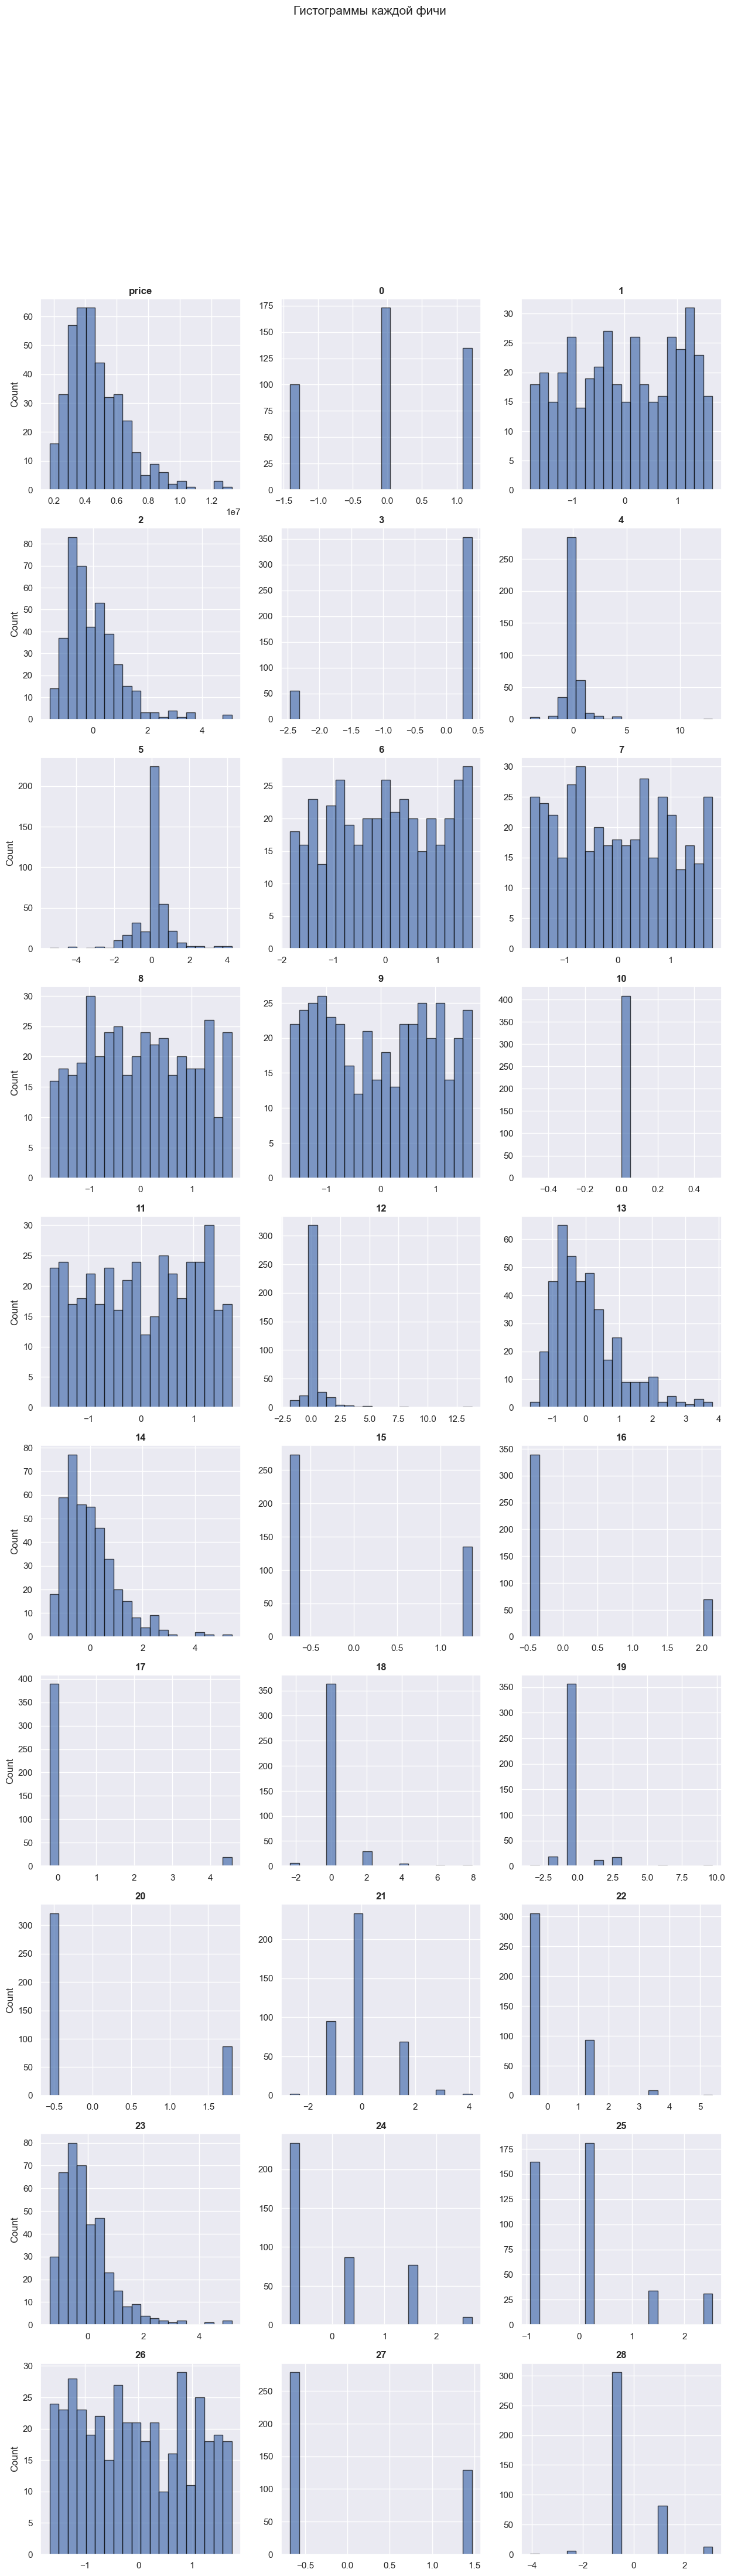

In [10]:
histmaker_for_numeric_df(data_train)

In [11]:
#сразу видно что фича 10 не нужна

In [12]:
data_train.describe()

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
count,4.080000e+02,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,...,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,4.737224e+06,0.021112,-0.003301,-0.011893,0.018605,0.028544,0.038168,-0.023595,-0.001552,-0.006136,...,0.007289,-0.051018,0.014040,-0.013599,-0.064105,-0.034111,0.037765,-0.040639,0.001248,-0.040703
std,1.865673e+06,0.992535,0.998581,0.977707,0.981679,0.998079,0.956908,1.018189,1.005549,0.992948,...,1.013391,0.967405,0.991954,1.017292,0.935958,1.005660,1.005871,0.997217,1.001723,0.967634
min,1.750000e+06,-1.406286,-1.790865,-1.591469,-2.465344,-3.986188,-5.413279,-1.837623,-1.648222,-1.771244,...,-3.418780,-0.554035,-2.665004,-0.570187,-1.369020,-0.805741,-0.929397,-1.657159,-0.679063,-4.050087
25%,3.430000e+06,-0.091662,-0.901293,-0.701308,0.405623,-0.126718,-0.024866,-0.868979,-0.865484,-0.840225,...,-0.141322,-0.554035,0.047278,-0.570187,-0.694949,-0.805741,-0.929397,-0.925067,-0.679063,-0.478408
50%,4.329500e+06,-0.091662,0.002391,-0.272371,0.405623,-0.126718,-0.024866,-0.011371,-0.027759,-0.014453,...,-0.141322,-0.554035,0.047278,-0.570187,-0.242940,-0.805741,0.224410,-0.106249,-0.679063,-0.478408
75%,5.740000e+06,1.222962,0.909385,0.504098,0.405623,0.058888,0.311665,0.882608,0.847563,0.816233,...,-0.141322,-0.554035,0.047278,1.421812,0.379395,0.355976,0.224410,0.814362,1.472618,-0.478408
max,1.330000e+07,1.222962,1.665706,5.096263,0.405623,13.021551,4.246676,1.670364,1.790334,1.777808,...,9.691053,1.804941,4.115701,5.405809,5.162983,2.679409,2.532024,1.741964,1.472618,3.093270


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    data_train.drop(['price'], axis = 1), data_train['price'])

In [19]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Пробую модель случайного леса

In [14]:
rf = RandomForestRegressor(n_estimators=500)

In [15]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [22]:
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

In [23]:
cv = StratifiedKFold(n_splits=5)

In [24]:
grid_rf = GridSearchCV(estimator=rf, n_jobs=-1, param_grid=param_grid, cv=cv , scoring=mape_scorer)
grid_rf.fit(X_train, y_train)

C:\Users\serdyukov\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(n_estimators=500), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False))

In [25]:
grid_result_rf = pd.DataFrame(grid_rf.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_rf

,18,21,12,13,9,11,10,15,17,14,...,26,6,7,8,5,3,1,4,0,2
mean_fit_time,3.063069,2.968153,2.849678,2.797142,3.146818,2.698103,2.921382,2.637708,2.616639,2.703327,...,2.610404,4.342363,4.347436,4.428852,4.617181,5.048215,5.512595,4.927075,6.283663,4.898442
std_fit_time,0.026063,0.386699,0.058075,0.047711,0.11525,0.133184,0.056949,0.014345,0.026774,0.028083,...,0.040835,0.040192,0.029823,0.171618,0.074012,0.094704,0.203494,0.087712,0.09416,0.115548
mean_score_time,0.140141,0.137153,0.12835,0.131564,0.129195,0.130284,0.135062,0.132638,0.132956,0.133386,...,0.110816,0.120797,0.134521,0.127263,0.133667,0.126898,0.126106,0.126877,0.133508,0.135139
std_score_time,0.008023,0.007569,0.002839,0.001944,0.007133,0.005935,0.018608,0.003514,0.005726,0.001824,...,0.019324,0.004952,0.001858,0.004723,0.002513,0.005124,0.010168,0.008308,0.004436,0.022235
param_max_features,log2,log2,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,...,log2,auto,auto,auto,auto,auto,auto,auto,auto,auto
param_min_samples_leaf,1,2,2,2,1,1,1,4,4,2,...,4,4,4,4,2,2,1,2,1,1
param_min_samples_split,2,2,2,5,2,10,5,2,10,10,...,10,2,5,10,10,2,5,5,2,10
params,"{'max_features': 'log2', 'min_samples_leaf': 1...","{'max_features': 'log2', 'min_samples_leaf': 2...","{'max_features': 'sqrt', 'min_samples_leaf': 2...","{'max_features': 'sqrt', 'min_samples_leaf': 2...","{'max_features': 'sqrt', 'min_samples_leaf': 1...","{'max_features': 'sqrt', 'min_samples_leaf': 1...","{'max_features': 'sqrt', 'min_samples_leaf': 1...","{'max_features': 'sqrt', 'min_samples_leaf': 4...","{'max_features': 'sqrt', 'min_samples_leaf': 4...","{'max_features': 'sqrt', 'min_samples_leaf': 2...",...,"{'max_features': 'log2', 'min_samples_leaf': 4...","{'max_features': 'auto', 'min_samples_leaf': 4...","{'max_features': 'auto', 'min_samples_leaf': 4...","{'max_features': 'auto', 'min_samples_leaf': 4...","{'max_features': 'auto', 'min_samples_leaf': 2...","{'max_features': 'auto', 'min_samples_leaf': 2...","{'max_features': 'auto', 'min_samples_leaf': 1...","{'max_features': 'auto', 'min_samples_leaf': 2...","{'max_features': 'auto', 'min_samples_leaf': 1...","{'max_features': 'auto', 'min_samples_leaf': 1..."
split0_test_score,-0.202642,-0.202768,-0.201425,-0.201584,-0.206243,-0.20135,-0.200068,-0.201015,-0.1987,-0.200875,...,-0.20495,-0.20652,-0.205927,-0.204948,-0.210963,-0.208239,-0.206109,-0.211343,-0.209526,-0.206801
split1_test_score,-0.210575,-0.209982,-0.212516,-0.213601,-0.212468,-0.211934,-0.215329,-0.214322,-0.216249,-0.216262,...,-0.218921,-0.229459,-0.229987,-0.230835,-0.239653,-0.239883,-0.246794,-0.242837,-0.243635,-0.248925


In [27]:
rf_final =  grid_rf.best_estimator_

In [28]:
rf_final.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=500)

## Вывел важность фич для конкретной модели случайного леса, отобрать фичи можно и с помощью rfe + rfecv ( rfecv выводит оптимум фич, а rfe отбирает нужное количество) но на контрольной работе буду делать "на глаз", поэтому просто буду брать n-ное количество фич и смотреть как они влияют на mape

## все в одной тетрадке, прогоняю один и тот же код, картинки разные

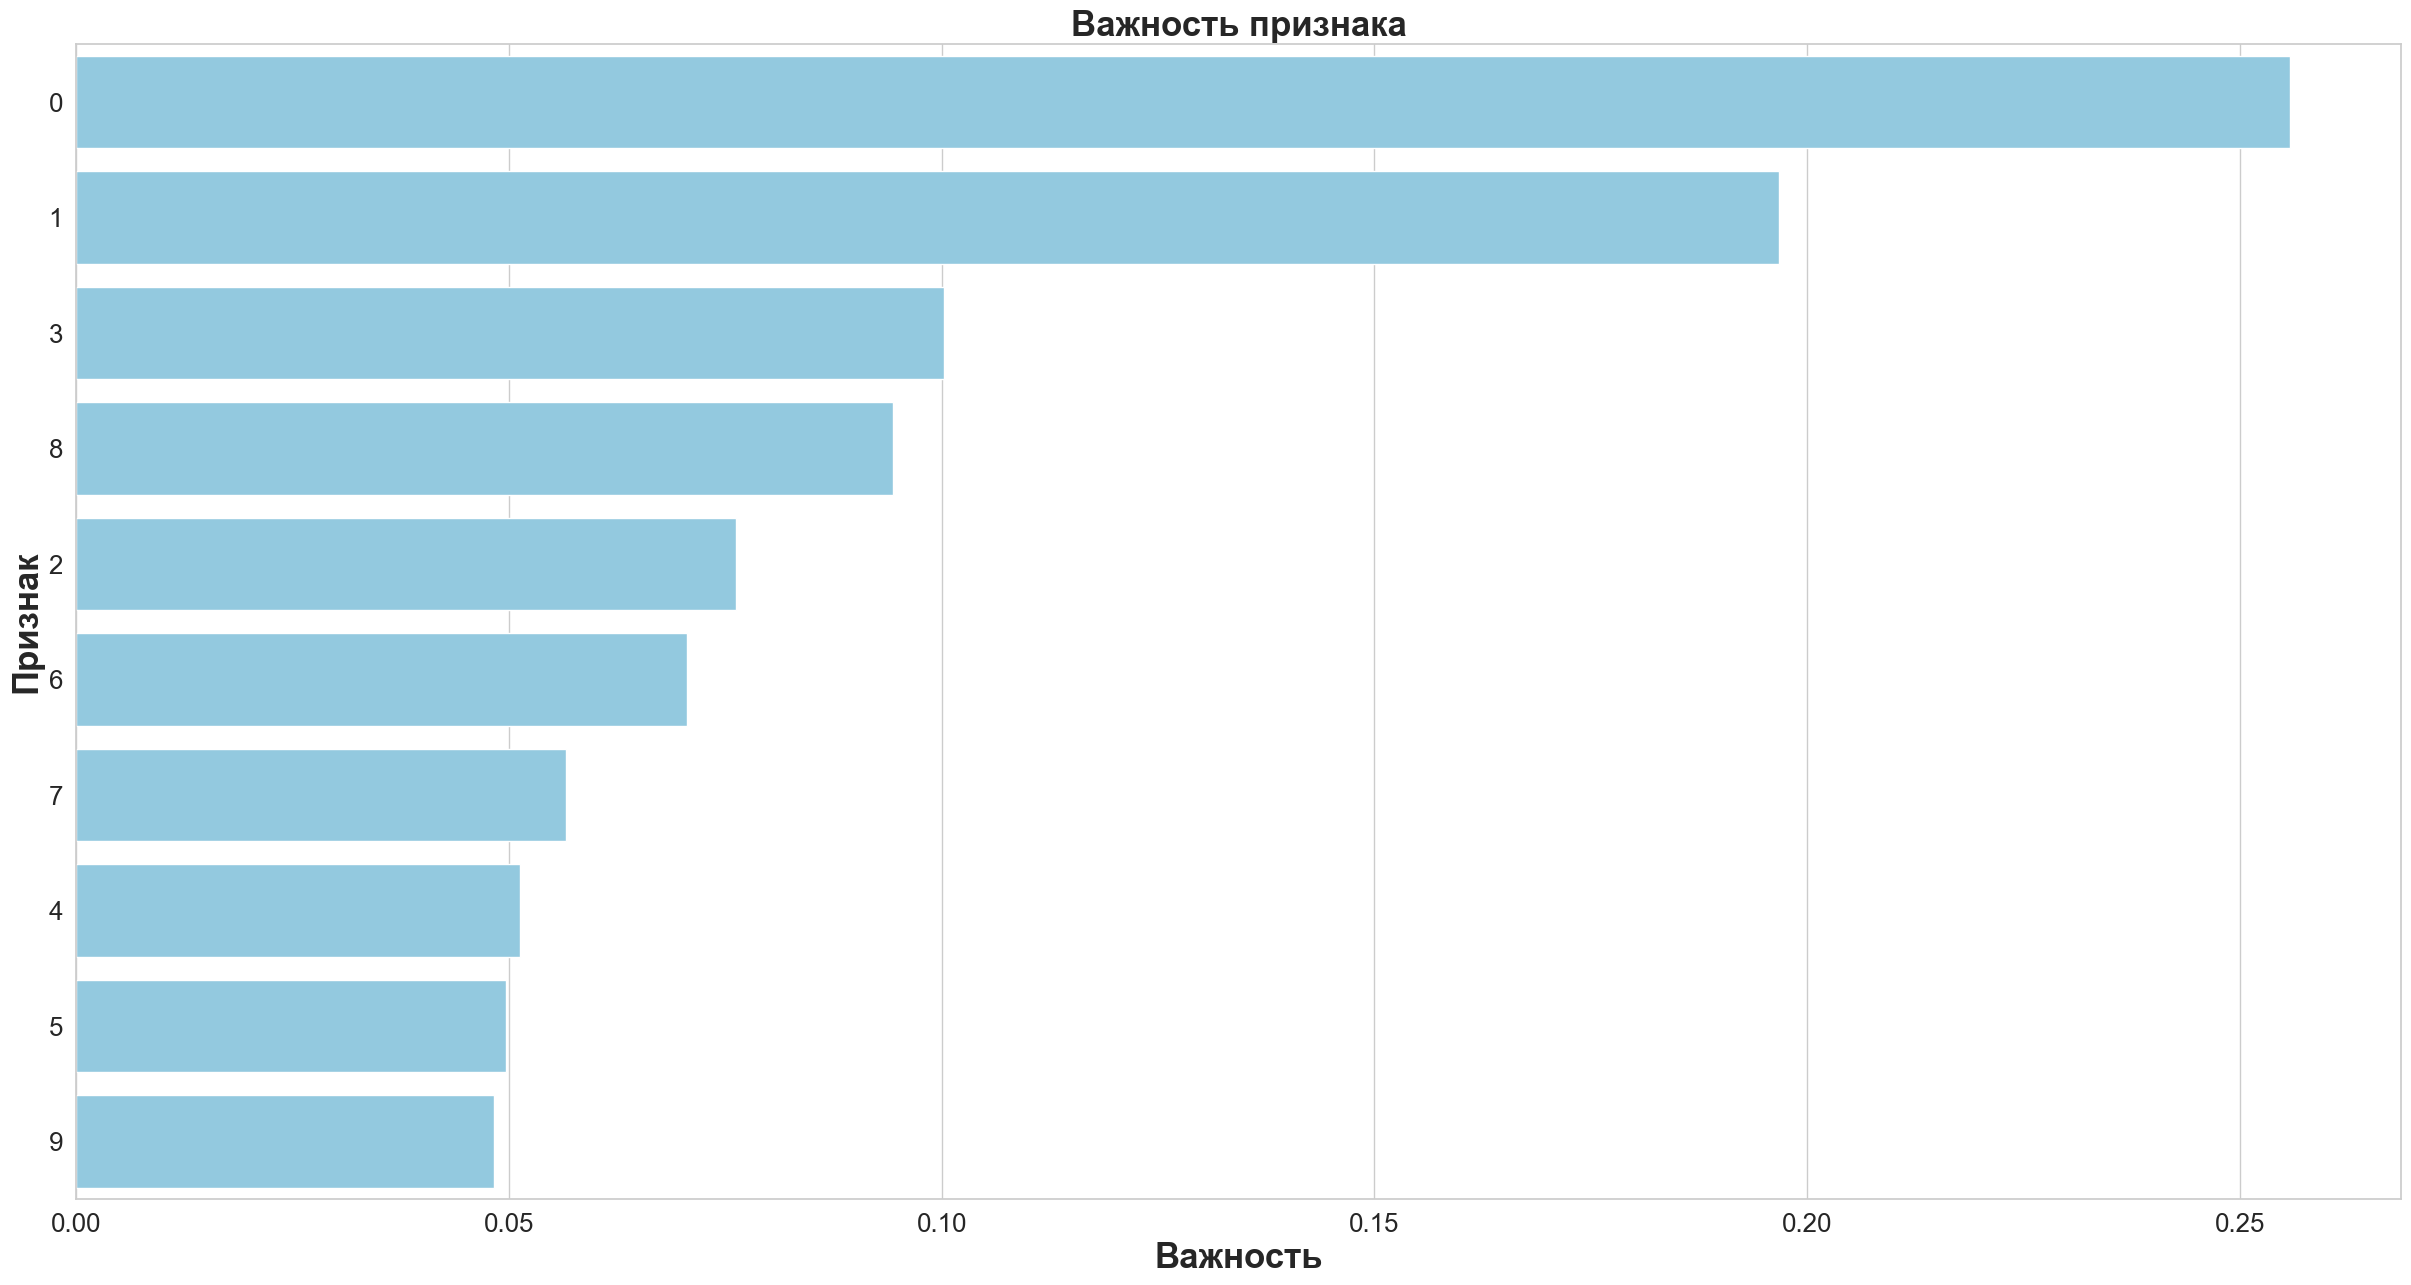

,Features,Gini-Importance
0,0,0.255834
1,1,0.196780
2,3,0.100288
3,8,0.094348
4,2,0.076264
5,6,0.070582
6,7,0.056637
7,4,0.051308
8,5,0.049643
9,9,0.048317


In [77]:
feature_importances = rf_final.feature_importances_

# Создаем DataFrame для важности признаков
feats = {}
for feature, importance in zip(data_train.drop(columns=['price']).columns, feature_importances):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})

# Сортируем и визуализируем признаки по важности
importances = importances.sort_values(by='Gini-Importance', ascending=False).reset_index().rename(columns={'index': 'Features'})
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots(figsize=(30,15))
sns.barplot(x='Gini-Importance', y='Features', data=importances, color='skyblue')
plt.xlabel('Важность', fontsize=25, weight='bold')
plt.ylabel('Признак', fontsize=25, weight='bold')
plt.title('Важность признака', fontsize=25, weight='bold')
plt.show()

# Отображение таблицы важности признаков
display(importances)

In [31]:
# 10 столбец точно улетает

In [32]:
y_pred = rf_final.predict(X_test)

In [34]:
print('mape: ', mean_absolute_percentage_error(y_pred,y_test))

mape:  0.17893248420951


,mean,std
22,0.076264,0.087161
6,0.094348,0.034968
5,0.100288,0.082744
12,0.196780,0.161503
2,0.255834,0.139947


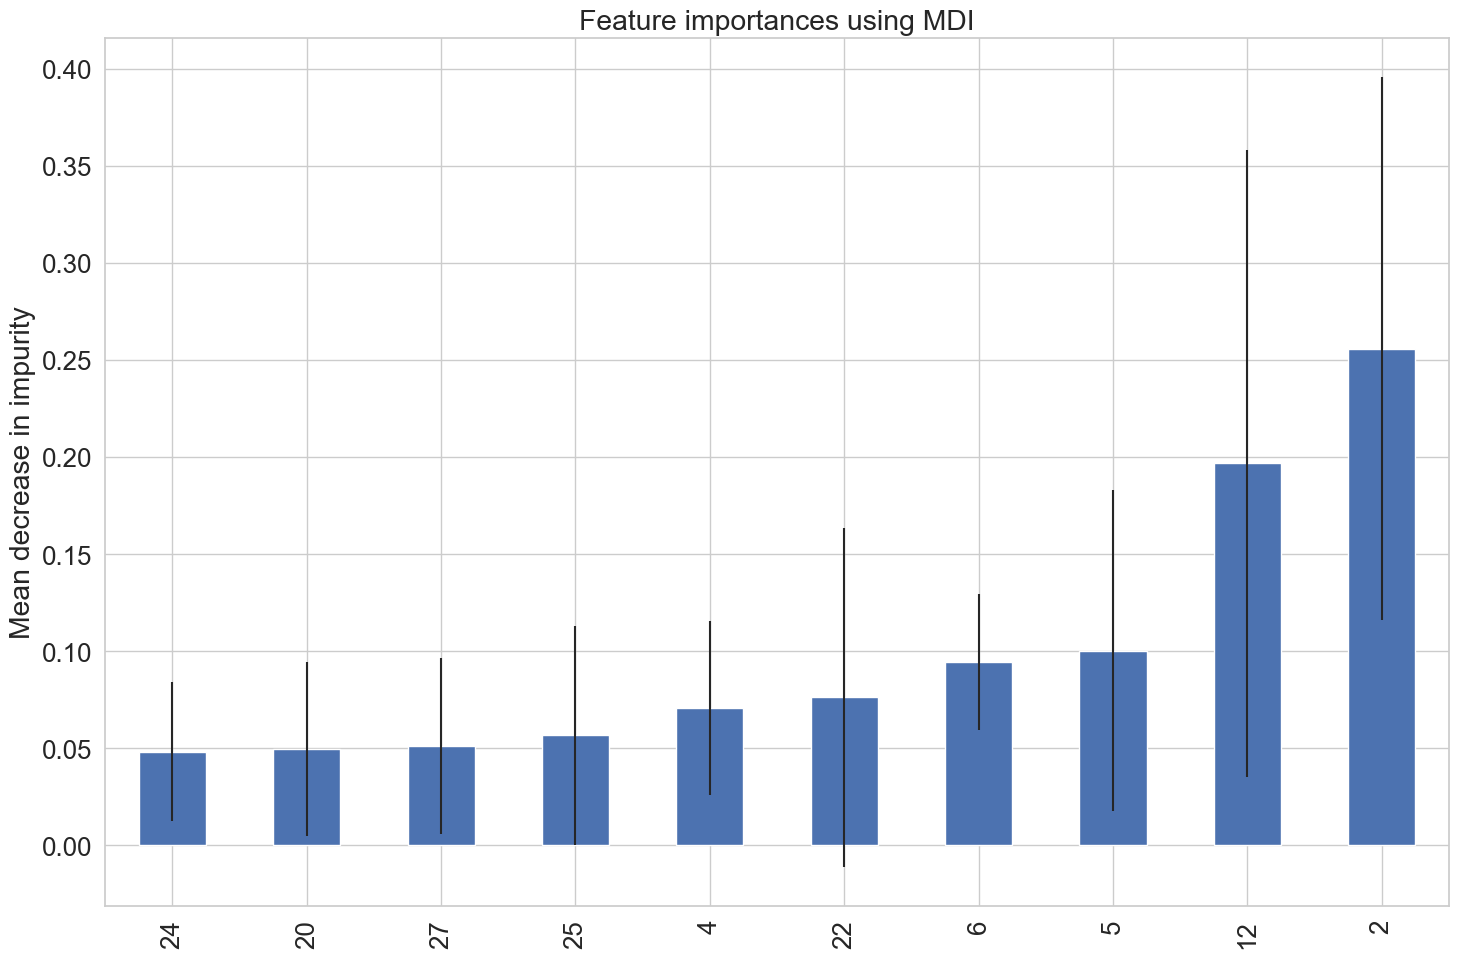

In [78]:
feature_names = rf_final.feature_names_in_  # Используйте feature_names_in_ для получения имен признаков
forest_importances = pd.DataFrame(rf_final.feature_importances_, index=feature_names, columns=['mean'])

# Вычисление стандартного отклонения важности признаков
forest_importances['std'] = np.std([tree.feature_importances_ for tree in rf_final.estimators_], axis=0)

# Сортировка важности признаков
sort_forest = forest_importances.sort_values(by='mean')

# Визуализация важности признаков
fig, ax = plt.subplots(figsize=(15, 10))
col = sort_forest['mean']
yerr = sort_forest['std']
col.plot.bar(yerr=yerr, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Отображение пяти наиболее важных признаков
display(sort_forest.tail(5))

In [38]:
importances.Features.values

array(['2', '12', '22', '5', '25', '4', '6', '27', '24', '20', '13', '26',
       '23', '8', '7', '0', '1', '19', '14', '11', '21', '9', '18', '15',
       '16', '28', '3', '17', '10'], dtype=object)

In [37]:
y = data_train['price']

## ВОТ тут лежат фичи, которые по итогу использовались в модели

In [50]:
important_col = ['2', '12', '22', '5', '25', '4', '6', '27', '24', '20']

In [51]:
X = data_train[important_col]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X , y)

In [53]:
rf_final.fit(X_train , y_train)

RandomForestRegressor(max_features='log2', n_estimators=500)

In [54]:
y_pred = rf_final.predict(X_test)

In [45]:
X_train

,2,12,22,5,25,4,6,27,24,20,13,26,23
274,1.429541,-0.223185,-0.570187,-1.812839,-0.929397,-0.126718,1.031652,-0.679063,-0.805741,-0.554035,0.877615,-1.526163,0.061706
196,-0.964205,-0.223185,-0.570187,0.729512,-0.929397,-0.126718,1.621942,-0.679063,-0.805741,-0.554035,2.112069,-0.122009,-0.525726
280,0.391790,0.624632,1.421812,1.346730,2.532024,0.666712,-0.677526,-0.679063,0.355976,-0.554035,-0.437217,-1.187130,1.166708
134,1.072094,1.517868,1.421812,2.791805,2.532024,-0.126718,-1.529471,1.472618,1.517692,-0.554035,-0.485692,0.741593,-0.306626
14,0.613177,-0.223185,-0.570187,-0.024866,0.224410,-0.126718,-1.049628,1.472618,0.355976,-0.554035,-0.183732,1.001603,0.342124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,-0.858124,-0.223185,-0.570187,0.616845,-0.929397,0.615706,0.929630,-0.679063,0.355976,-0.554035,0.550065,-0.854257,0.481102
80,-1.326265,-0.223185,-0.570187,-1.163780,1.378217,-0.126718,-0.736821,1.472618,-0.805741,1.804941,-0.044989,-0.536678,-0.676561
370,0.244198,-0.223185,-0.570187,-0.024866,0.224410,-0.126718,-0.778393,1.472618,0.355976,-0.554035,-1.071872,0.683484,-0.650330
278,-0.922695,-1.101281,1.421812,0.685425,-0.929397,0.695049,-1.741962,-0.679063,-0.805741,-0.554035,-0.999782,0.807207,0.030744


In [55]:
print('mape: ', mean_absolute_percentage_error(y_pred,y_test))

mape:  0.16546688543253066


In [56]:
boost = GradientBoostingRegressor( n_estimators=500)

In [57]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'subsample': [0.5, 0.75, 1.0]
}

In [58]:
grid_boost = GridSearchCV(estimator=boost, n_jobs=-1, param_grid=param_grid, cv=cv , scoring=mape_scorer)
grid_boost.fit(X_train, y_train)

C:\Users\serdyukov\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingRegressor(n_estimators=500), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'subsample': [0.5, 0.75, 1.0]},
             scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False))

In [60]:
grid_result_boost = pd.DataFrame(grid_boost.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_boost

,51,45,63,73,75,36,79,69,66,72,...,208,162,195,240,180,213,177,183,186,210
mean_fit_time,1.080368,1.154434,1.196716,1.061491,1.071607,1.119608,1.085483,1.108653,1.122971,1.036333,...,1.141036,1.555535,1.143998,1.15334,1.468968,1.096235,1.53286,1.493938,1.477152,1.172019
std_fit_time,0.012932,0.072701,0.033632,0.0127,0.057602,0.037838,0.047905,0.057734,0.024225,0.009046,...,0.052719,0.027557,0.122853,0.064939,0.031902,0.067539,0.095175,0.017068,0.06838,0.115838
mean_score_time,0.007098,0.007009,0.007896,0.006976,0.007042,0.008796,0.006696,0.00702,0.007155,0.006994,...,0.00705,0.007126,0.006593,0.006917,0.007525,0.006158,0.008133,0.007058,0.00779,0.006111
std_score_time,0.000466,0.000674,0.002088,0.000001,0.000587,0.004026,0.000618,0.00037,0.000525,0.000028,...,0.000524,0.000803,0.001909,0.000355,0.000972,0.00102,0.001479,0.000497,0.000618,0.001566
param_learning_rate,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
param_max_features,sqrt,sqrt,log2,log2,log2,sqrt,log2,log2,log2,log2,...,sqrt,auto,sqrt,log2,auto,sqrt,auto,auto,auto,sqrt
param_min_samples_leaf,4,4,2,4,4,2,4,2,2,4,...,4,1,1,4,4,4,2,4,4,4
param_min_samples_split,10,2,2,2,5,2,10,10,5,2,...,2,2,10,10,2,10,10,5,10,5
param_subsample,0.5,0.5,0.5,0.75,0.5,0.5,0.75,0.5,0.5,0.5,...,0.75,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
params,"{'learning_rate': 0.01, 'max_features': 'sqrt'...","{'learning_rate': 0.01, 'max_features': 'sqrt'...","{'learning_rate': 0.01, 'max_features': 'log2'...","{'learning_rate': 0.01, 'max_features': 'log2'...","{'learning_rate': 0.01, 'max_features': 'log2'...","{'learning_rate': 0.01, 'max_features': 'sqrt'...","{'learning_rate': 0.01, 'max_features': 'log2'...","{'learning_rate': 0.01, 'max_features': 'log2'...","{'learning_rate': 0.01, 'max_features': 'log2'...","{'learning_rate': 0.01, 'max_features': 'log2'...",...,"{'learning_rate': 0.2, 'max_features': 'sqrt',...","{'learning_rate': 0.2, 'max_features': 'auto',...","{'learning_rate': 0.2, 'max_features': 'sqrt',...","{'learning_rate': 0.2, 'max_features': 'log2',...","{'learning_rate': 0.2, 'max_features': 'auto',...","{'learning_rate': 0.2, 'max_features': 'sqrt',...","{'learning_rate': 0.2, 'max_features': 'auto',...","{'learning_rate': 0.2, 'max_features': 'auto',...","{'learning_rate': 0.2, 'max_features': 'auto',...","{'learning_rate': 0.2, 'max_features': 'sqrt',..."


In [61]:
boost_final =  grid_rf.best_estimator_

In [65]:
boost_final.fit(X_train , y_train)

RandomForestRegressor(max_features='log2', n_estimators=500)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    data_train.drop(['price'], axis = 1), data_train['price'])

In [64]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
54,1.222962,0.222757,-1.084123,0.405623,-0.126718,0.856875,1.562472,-0.330967,-1.234928,0.712761,...,-0.141322,-0.554035,0.047278,-0.570187,-0.258605,-0.805741,-0.929397,0.843305,-0.679063,-0.478408
309,-1.406286,0.740853,-0.124780,0.405623,0.031968,-0.024866,-1.830165,0.950558,-0.926043,0.991094,...,-0.141322,1.804941,1.403419,1.421812,-0.684888,0.355976,0.224410,-0.736086,1.472618,-0.478408
243,-1.406286,0.505896,1.429541,0.405623,-0.126718,-1.812839,1.229799,-1.407332,-1.447682,-1.400615,...,-0.141322,-0.554035,0.047278,-0.570187,0.598406,1.517692,-0.929397,1.597042,-0.679063,-0.478408
280,-0.091662,-1.532107,0.391790,0.405623,0.666712,1.346730,-0.677526,-0.634447,0.131050,-1.607479,...,3.136137,-0.554035,1.403419,1.421812,1.166708,0.355976,2.532024,-1.187130,-0.679063,3.093270
148,1.222962,1.220892,-0.761267,0.405623,-0.750127,-0.024866,-1.837623,-0.957055,-0.298152,0.667483,...,-0.141322,-0.554035,1.403419,-0.570187,-0.819853,1.517692,0.224410,-0.202465,1.472618,-0.478408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,1.222962,0.099609,-0.950369,0.405623,0.729053,0.714816,1.288581,-0.859308,0.182472,1.269789,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.164848,-0.805741,-0.929397,-1.053632,-0.679063,1.307431
274,-1.406286,1.382324,1.429541,0.405623,-0.126718,-1.812839,1.031652,-1.648222,-1.237871,1.374056,...,-0.141322,-0.554035,0.047278,-0.570187,0.061706,-0.805741,-0.929397,-1.526163,-0.679063,-0.478408
384,1.222962,0.042812,-1.013556,0.405623,-0.126718,-0.024866,0.854651,1.787941,-0.239586,1.561149,...,-0.141322,-0.554035,0.047278,-0.570187,0.035388,-0.805741,0.224410,-0.916708,1.472618,-0.478408
101,1.222962,0.896262,-0.991879,0.405623,0.780059,0.758903,-1.269287,1.398028,-1.054691,1.104660,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.307688,0.355976,-0.929397,-0.001758,-0.679063,1.307431


In [66]:
y_pred = boost_final.predict(X_test)

In [67]:
print('mape: ', mean_absolute_percentage_error(y_pred,y_test))

mape:  0.1794311737970043


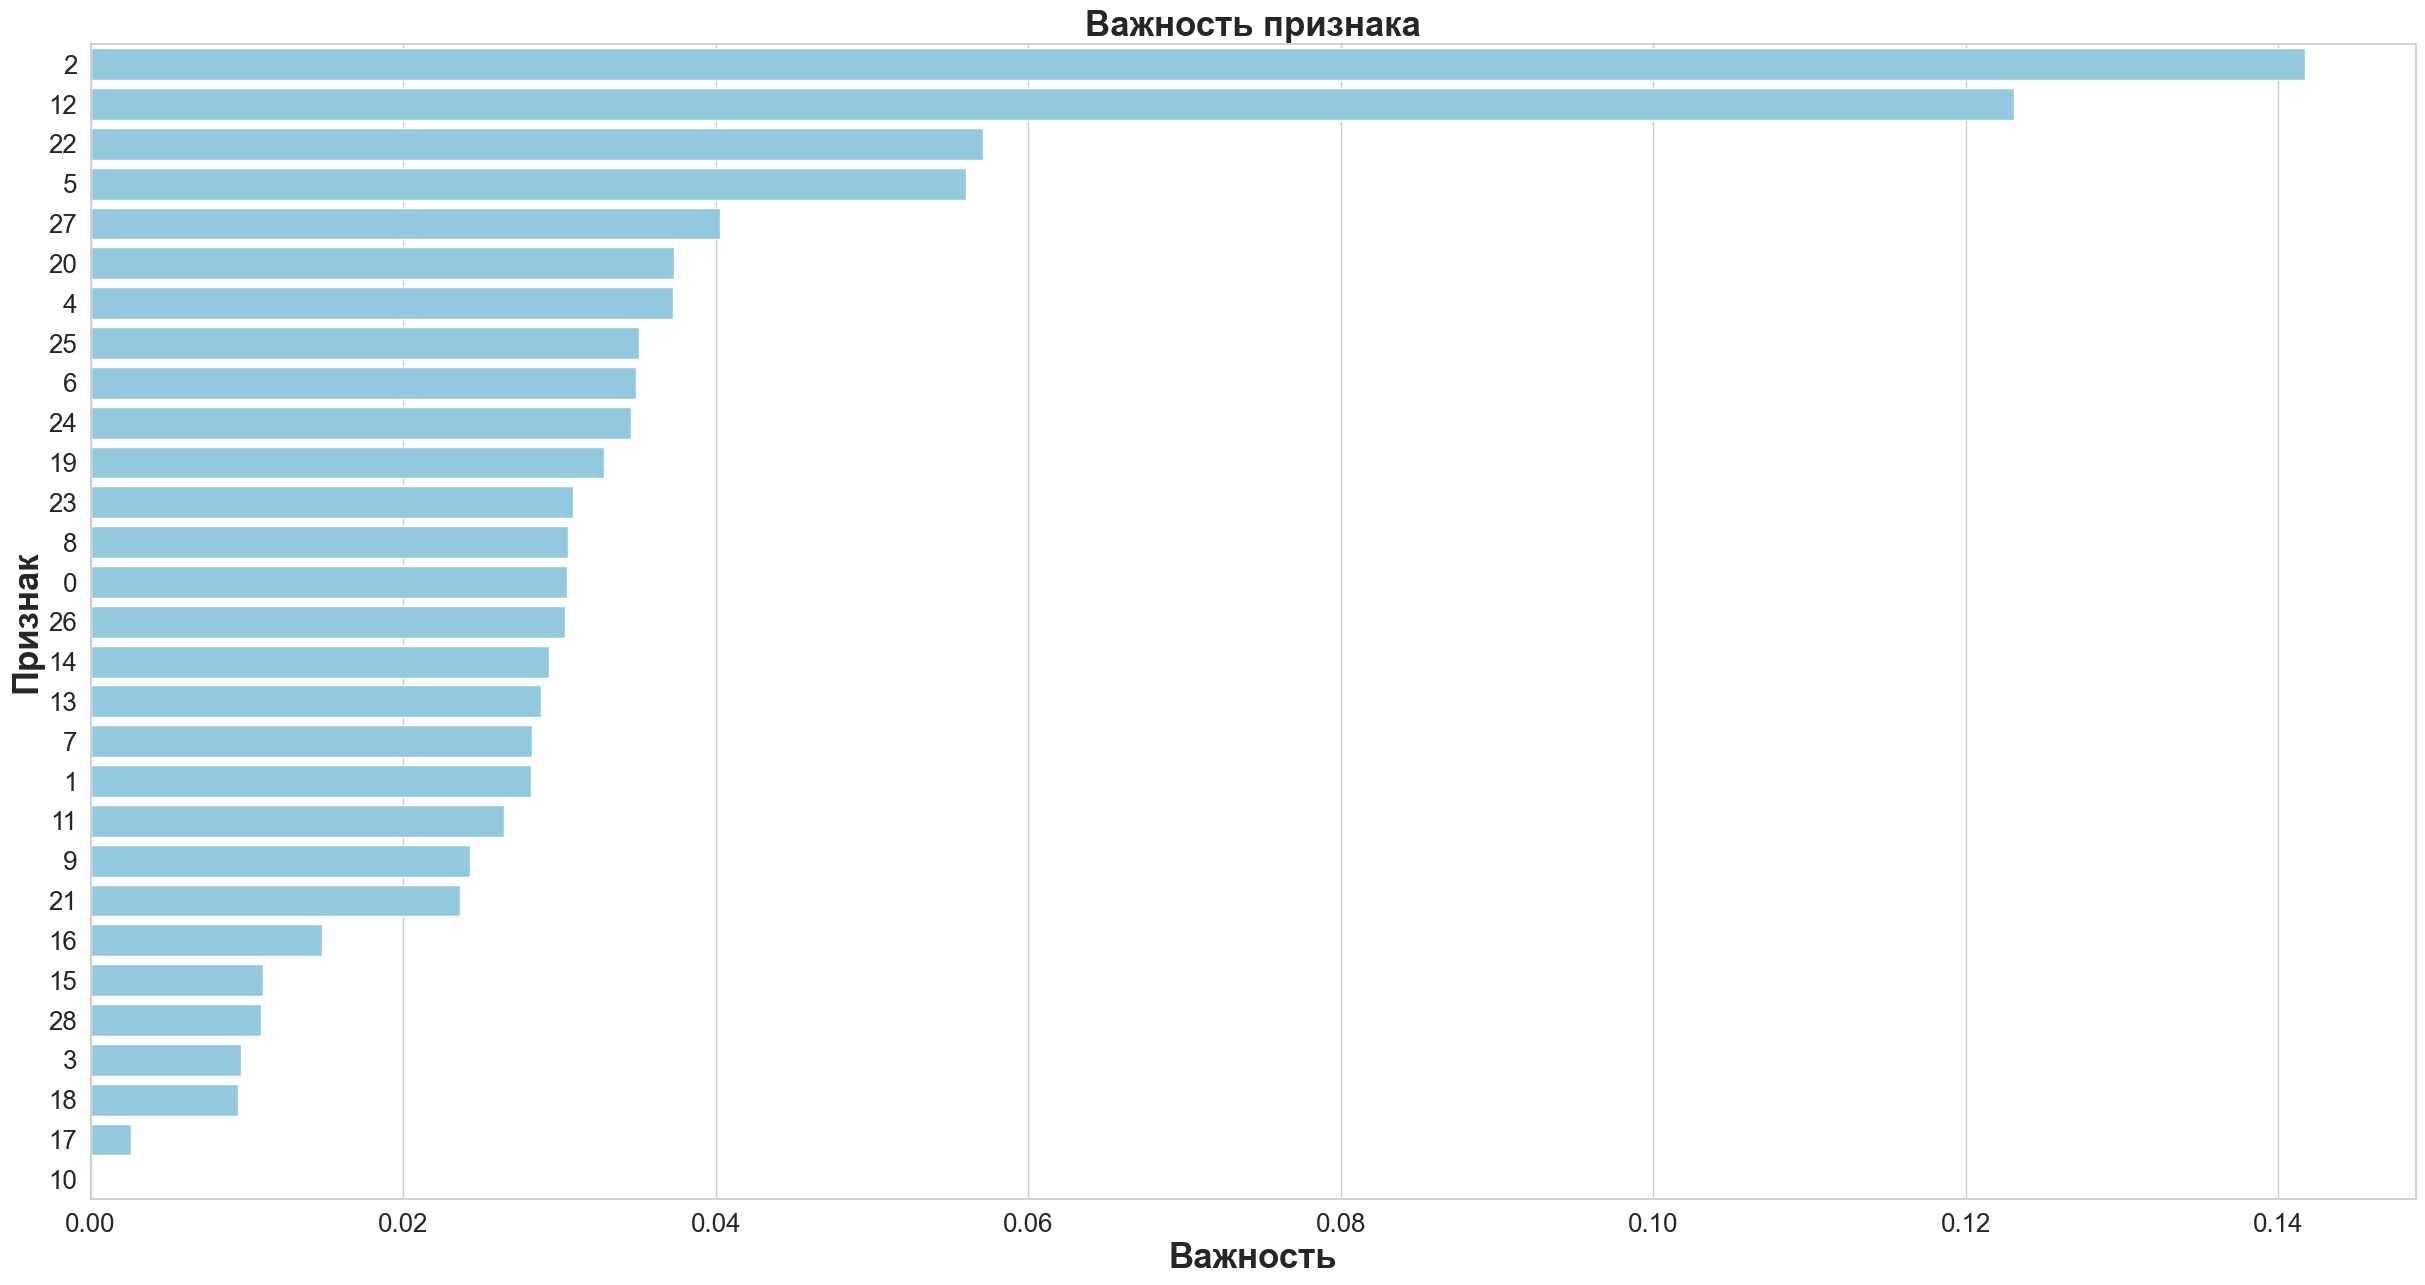

,Features,Gini-Importance
0,2,0.141693
1,12,0.123072
2,22,0.057118
3,5,0.056017
4,27,0.040291
5,20,0.037362
6,4,0.037295
7,25,0.035099
8,6,0.034886
9,24,0.034582


In [68]:
feature_importances = boost_final.feature_importances_

# Создаем DataFrame для важности признаков
feats = {}
for feature, importance in zip(data_train.drop(columns=['price']).columns, feature_importances):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})

# Сортируем и визуализируем признаки по важности
importances = importances.sort_values(by='Gini-Importance', ascending=False).reset_index().rename(columns={'index': 'Features'})
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots(figsize=(30,15))
sns.barplot(x='Gini-Importance', y='Features', data=importances, color='skyblue')
plt.xlabel('Важность', fontsize=25, weight='bold')
plt.ylabel('Признак', fontsize=25, weight='bold')
plt.title('Важность признака', fontsize=25, weight='bold')
plt.show()

# Отображение таблицы важности признаков
display(importances)

In [69]:
importances.Features.values

array(['2', '12', '22', '5', '27', '20', '4', '25', '6', '24', '19', '23',
       '8', '0', '26', '14', '13', '7', '1', '11', '9', '21', '16', '15',
       '28', '3', '18', '17', '10'], dtype=object)

In [71]:
important_col = ['2', '12', '22', '5', '27', '20', '4', '25', '6', '24']

In [72]:
X = data_train[important_col]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X , y)

In [74]:
boost_final.fit(X_train , y_train)

RandomForestRegressor(max_features='log2', n_estimators=500)

In [75]:
y_pred = boost_final.predict(X_test)

In [76]:
print('mape: ', mean_absolute_percentage_error(y_pred,y_test))

mape:  0.23740459356158441


In [79]:
from sklearn.metrics import mean_absolute_percentage_error


def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print("MAPE Error:", "{:,.2f}".format(mape*100))

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()


In [80]:
plot_2_error(y_test, y_pred)

KeyError: 68

In [84]:
X_test

,2,12,22,5,27,20,4,25,6,24
79,-0.715145,-0.223185,-0.570187,0.464990,-0.679063,-0.554035,-0.126718,-0.929397,-0.275425,0.355976
34,1.000604,1.424002,1.421812,-0.024866,-0.679063,-0.554035,1.414803,0.224410,-0.310680,-0.805741
151,-1.108568,-1.345331,1.421812,-0.024866,-0.679063,-0.554035,-1.176879,0.224410,-1.017966,-0.805741
172,-0.991879,-0.223185,-0.570187,-0.024866,-0.679063,-0.554035,0.780059,0.224410,-1.021337,-0.805741
372,-0.161678,-0.223185,-0.570187,0.073105,1.472618,-0.554035,-0.126718,1.378217,-0.860260,-0.805741
...,...,...,...,...,...,...,...,...,...,...
74,-0.696696,-0.223185,-0.570187,-0.024866,1.472618,-0.554035,-0.126718,0.224410,0.436177,-0.805741
123,1.498725,-0.223185,-0.570187,3.698038,-0.679063,-0.554035,2.026878,2.532024,1.573414,2.679409
355,0.488647,-0.223185,-0.570187,1.552470,1.472618,-0.554035,0.785727,2.532024,-1.176185,-0.805741
222,-0.991879,-0.223185,-0.570187,-0.024866,1.472618,-0.554035,0.780059,0.224410,-1.183695,-0.805741


In [85]:
len(y_pred)

102

In [87]:
len(y_test)

102

In [90]:
knn_regressor = KNeighborsRegressor()

In [91]:
param_grid = {
    'n_neighbors': [3, 5, 10, 12],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

In [92]:
grid_search = GridSearchCV(knn_regressor, param_grid, cv=cv, n_jobs=-1, verbose=2 , scoring =mape_scorer )
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\serdyukov\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 10, 12],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
             verbose=2)

In [93]:
grid_result_knn = pd.DataFrame(grid_search.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_knn

,14,15,12,13,4,20,5,21,7,23,...,22,3,19,11,8,9,0,16,1,17
mean_fit_time,0.00359,0.003217,0.003595,0.00339,0.0057,0.005053,0.005152,0.004613,0.005767,0.005174,...,0.004786,0.005838,0.004555,0.004233,0.004259,0.00279,0.016182,0.002999,0.009281,0.003922
std_fit_time,0.000488,0.000738,0.000494,0.000488,0.000353,0.000298,0.000412,0.000527,0.000602,0.000503,...,0.000201,0.000557,0.000805,0.000752,0.000741,0.000745,0.010634,0.000623,0.003595,0.000975
mean_score_time,0.003783,0.002401,0.003592,0.003189,0.004946,0.004802,0.004616,0.005989,0.004622,0.003822,...,0.004499,0.005545,0.004693,0.003648,0.003191,0.003147,0.006045,0.002919,0.006301,0.00399
std_score_time,0.000399,0.000481,0.000491,0.000748,0.000154,0.000676,0.000247,0.001553,0.001018,0.000731,...,0.000965,0.000747,0.00026,0.000549,0.000748,0.000899,0.000493,0.000981,0.000433,0.000558
param_metric,manhattan,manhattan,manhattan,manhattan,euclidean,minkowski,euclidean,minkowski,euclidean,minkowski,...,minkowski,euclidean,minkowski,manhattan,manhattan,manhattan,euclidean,minkowski,euclidean,minkowski
param_n_neighbors,12,12,10,10,10,10,10,10,12,12,...,12,5,5,5,3,3,3,3,3,3
param_weights,uniform,distance,uniform,distance,uniform,uniform,distance,distance,distance,distance,...,uniform,distance,distance,distance,uniform,distance,uniform,uniform,distance,distance
params,"{'metric': 'manhattan', 'n_neighbors': 12, 'we...","{'metric': 'manhattan', 'n_neighbors': 12, 'we...","{'metric': 'manhattan', 'n_neighbors': 10, 'we...","{'metric': 'manhattan', 'n_neighbors': 10, 'we...","{'metric': 'euclidean', 'n_neighbors': 10, 'we...","{'metric': 'minkowski', 'n_neighbors': 10, 'we...","{'metric': 'euclidean', 'n_neighbors': 10, 'we...","{'metric': 'minkowski', 'n_neighbors': 10, 'we...","{'metric': 'euclidean', 'n_neighbors': 12, 'we...","{'metric': 'minkowski', 'n_neighbors': 12, 'we...",...,"{'metric': 'minkowski', 'n_neighbors': 12, 'we...","{'metric': 'euclidean', 'n_neighbors': 5, 'wei...","{'metric': 'minkowski', 'n_neighbors': 5, 'wei...","{'metric': 'manhattan', 'n_neighbors': 5, 'wei...","{'metric': 'manhattan', 'n_neighbors': 3, 'wei...","{'metric': 'manhattan', 'n_neighbors': 3, 'wei...","{'metric': 'euclidean', 'n_neighbors': 3, 'wei...","{'metric': 'minkowski', 'n_neighbors': 3, 'wei...","{'metric': 'euclidean', 'n_neighbors': 3, 'wei...","{'metric': 'minkowski', 'n_neighbors': 3, 'wei..."
split0_test_score,-0.18757,-0.187975,-0.189735,-0.189602,-0.1875,-0.1875,-0.186998,-0.186998,-0.185345,-0.185345,...,-0.188409,-0.18707,-0.18707,-0.189749,-0.186999,-0.193849,-0.194914,-0.194914,-0.199367,-0.199367
split1_test_score,-0.168923,-0.1775,-0.171312,-0.17843,-0.171348,-0.171348,-0.175453,-0.175453,-0.180306,-0.180306,...,-0.176649,-0.182717,-0.182717,-0.18523,-0.1916,-0.194939,-0.195048,-0.195048,-0.19679,-0.19679


In [94]:
knn_final =  grid_search.best_estimator_

In [95]:
knn_final.fit(X_train , y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=12)

In [96]:
y_pred = knn_final.predict(X_test)

In [97]:
print('mape: ', mean_absolute_percentage_error(y_pred,y_test))

mape:  0.24132149785463228


In [98]:
feature_importances = knn_final.feature_importances_

# Создаем DataFrame для важности признаков
feats = {}
for feature, importance in zip(data_train.drop(columns=['price']).columns, feature_importances):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})

# Сортируем и визуализируем признаки по важности
importances = importances.sort_values(by='Gini-Importance', ascending=False).reset_index().rename(columns={'index': 'Features'})
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots(figsize=(30,15))
sns.barplot(x='Gini-Importance', y='Features', data=importances, color='skyblue')
plt.xlabel('Важность', fontsize=25, weight='bold')
plt.ylabel('Признак', fontsize=25, weight='bold')
plt.title('Важность признака', fontsize=25, weight='bold')
plt.show()

# Отображение таблицы важности признаков
display(importances)

AttributeError: 'KNeighborsRegressor' object has no attribute 'feature_importances_'

# knn регрессор не имеет важность фичей, тупо, но забыл об этом

## Итог следующий: лучший mape показал RFregressor, отобрал 10 фич конкретно для этой модели, которые являются важными, выбрал 10, потому что посчитал нужным отбирать фичи с важностью больше 3,5 % , модель gboost показала неплохие результаты, а knn вообще зря использовал, можно было ещё попробовать ridge и lasso, но времени мало

## у выбранных фичей есть проблема: разброс важности конкретных фичей в разных деревьях сильный, исправить эту проблему можно с помощью permutation, но при попытке составить coor matrix возникают ошибки, поэтому оставил фичи без изменений, Хотя можно сделать лучше...